In [1]:
import sys
sys.path.append('..')
from settings import *
from fermiqp.lattice import *
import matplotlib.colors as colors

# RIN

In [17]:
def shot_noise(wavelength,power):
    '''returns shot noise limit (Hz-1) for optical power (W) at given wavelength (m)'''
    f = c/wavelength
    return 2*hplanck*f/power
def shot_noise_to_dBc_Hz(shot_noise):
    return 10*np.log10(shot_noise)

In [33]:
shot_noise_to_dBc_Hz(shot_noise(1064e-9,3.8e-3))

-160.07360997579158

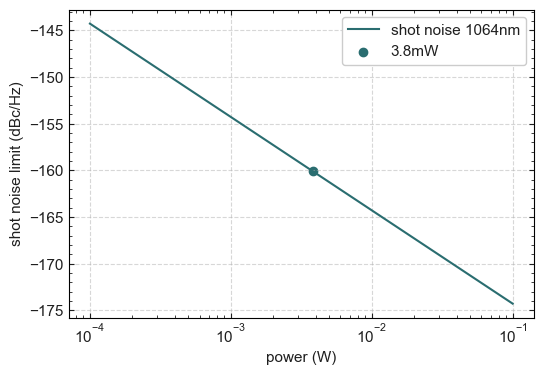

In [36]:
plt.figure(figsize=(6,4))
power = np.geomspace(0.1e-3,100e-3,100)
plt.semilogx(power,shot_noise_to_dBc_Hz(shot_noise(1064e-9,power)),'-',label='shot noise 1064nm')

plt.scatter(3.8e-3,shot_noise_to_dBc_Hz(shot_noise(1064e-9,3.8e-3)),label='3.8mW')

plt.xlabel('power (W)')
plt.ylabel('shot noise limit (dBc/Hz)')
plt.legend()
plt.grid()

In [39]:
def pick_off_percentage(req_power,power):
    return req_power/(req_power+power)

In [47]:
pick_off_percentage(3.8,80e3)*1000000

47.49774385716678

# Berek compensators - material comparison

The achievable retardence depends on the birefringence of the material. As shown below the birefringence of caclite is more than one order of magnitude larger than that of quartz

## MgF2

In [170]:
def n0(wavelength):
    ''' wavelengh in um'''
    return np.sqrt(1+0.4876*wavelength**2/(wavelength**2-0.0434**2)+0.3988*wavelength**2/(wavelength**2-0.0946**2)+2.312*wavelength**2/(wavelength**2-23.7936**2))
def ne(wavelength):
    '''wavelength in um '''
    return np.sqrt(1+0.4134*wavelength**2/(wavelength**2-0.0368**2)+0.5050*wavelength**2/(wavelength**2-0.0908**2)+2.4905*wavelength**2/(wavelength**2-23.772**2))

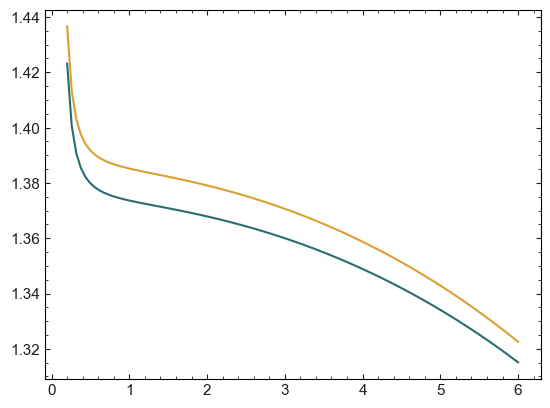

In [171]:
wavelength = np.linspace(0.2,6,100)
plt.plot(wavelength,n0(wavelength),'-')
plt.plot(wavelength,ne(wavelength),'-')

In [172]:
def berek_retardance(wavelength,tilt_angle):
    n_ord=n0(wavelength)
    n_ex=ne(wavelength)
    return 2000/wavelength*np.sqrt(n_ord**2-np.sin(tilt_angle)**2)*(np.sqrt((1-(np.sin(tilt_angle)/n_ex)**2)/(1-(np.sin(tilt_angle)/n_ord)**2))-1)

In [173]:
n_ord=n0(1)
n_ex=ne(1)
n_ord-n_ex

-0.01156788855207913

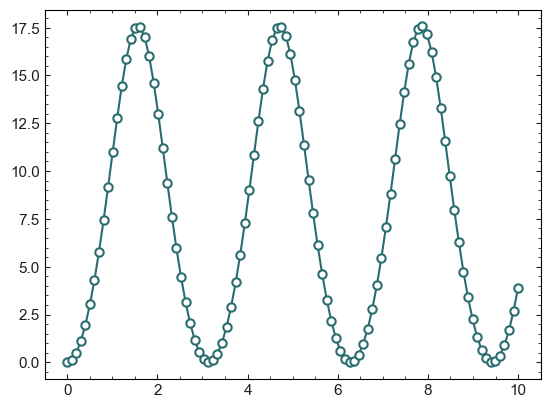

In [174]:
tilt = np.linspace(0,10,100)
plt.plot(tilt,berek_retardance(1,tilt))

In [168]:
def rad_to_degree(angle):
    return(180*angle/np.pi)

Text(0.5, 1.0, 'Berek compensator MgF2')

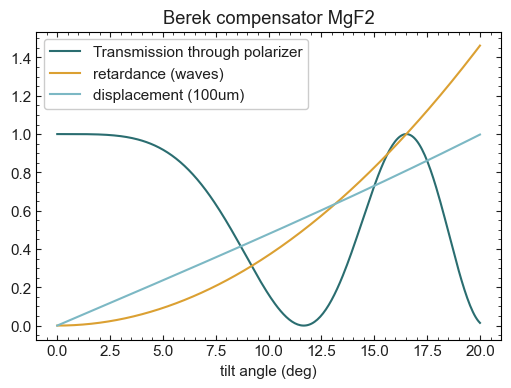

In [169]:
plt.figure(figsize=(6,4))
tilt = np.linspace(0,20*np.pi/180,300)
plt.plot(rad_to_degree(tilt),np.cos(np.pi*berek_retardance(1,tilt))**2,'-',label='Transmission through polarizer')
plt.plot(rad_to_degree(tilt),berek_retardance(1,tilt),'-',label='retardance (waves)')
plt.plot(rad_to_degree(tilt),10*displacement(tilt,1.37),'-',label='displacement (100um)')
plt.legend()
plt.xlabel('tilt angle (deg)')
plt.title('Berek compensator MgF2')

# calcite

In [136]:
def berek_retardance_caclite(tilt_angle):
    n_ord= 1.6425
    n_ex= 1.4796
    return 2000/1.064*np.sqrt(n_ex**2-np.sin(tilt_angle)**2)*(np.sqrt((1-(np.sin(tilt_angle)/n_ord)**2)/(1-(np.sin(tilt_angle)/n_ex)**2))-1)

In [137]:
n_ord= 1.6425
n_ex= 1.4796
n_ord-n_ex

0.16290000000000004

Text(0.5, 1.0, 'Berek compensator Calcite')

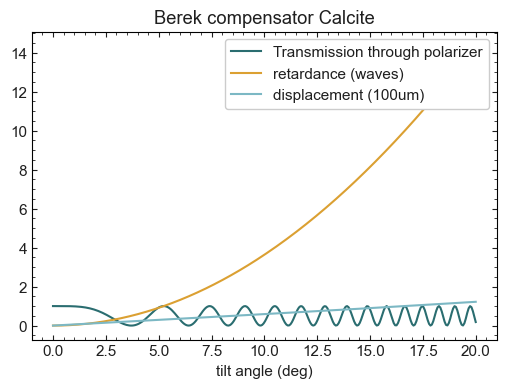

In [198]:
plt.figure(figsize=(6,4))
tilt = np.linspace(0,20*np.pi/180,300)
plt.plot(rad_to_degree(tilt),np.cos(np.pi*berek_retardance_caclite(tilt))**2,'-',label='Transmission through polarizer')
plt.plot(rad_to_degree(tilt),berek_retardance_caclite(tilt),'-',label='retardance (waves)')
plt.plot(rad_to_degree(tilt),10*displacement(tilt,1.5),'-',label='displacement (100um)')
plt.legend(loc='upper right')
plt.xlabel('tilt angle (deg)')
plt.title('Berek compensator Calcite')

In [151]:
def displacement(angle,n):
    return 1*np.sin(angle)*(1-np.cos(angle)/(np.sqrt(n**2-np.sin(angle)**2)))

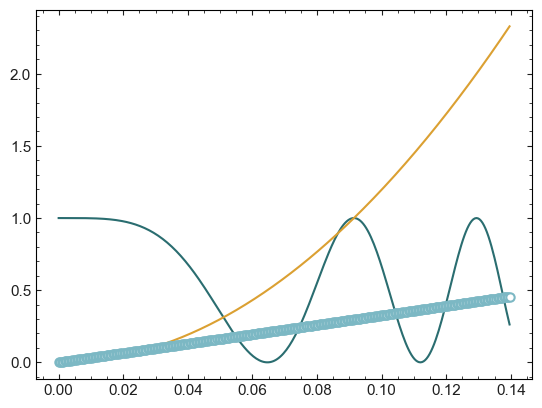

In [153]:
tilt = np.linspace(0,8*np.pi/180,300)
plt.plot(tilt,np.cos(np.pi*berek_retardance_caclite(tilt))**2,'-')
plt.plot(tilt,berek_retardance_caclite(tilt),'-')
plt.plot(tilt,10*displacement(tilt,n_ex))

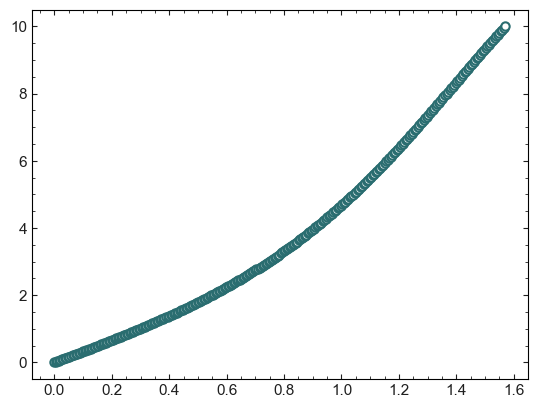

In [154]:
tilt = np.linspace(0,90*np.pi/180,300)
plt.plot(tilt,10*displacement(tilt,n_ex))

## quartz

In [96]:
def n0_quartz(wavelength):
    return np.sqrt(2.35728-0.0117*wavelength**2+0.01054*wavelength**(-2)+1.34143e-4*wavelength**(-4)-4.45368e-7*wavelength**(-6)+5.92362e-8*wavelength**(-8))
def ne_quartz(wavelength):
    return np.sqrt(2.3849-0.01259*wavelength**2+0.01079*wavelength**(-2)+1.6518e-4*wavelength**(-4)-1.94741e-6*wavelength**(-6)+9.36476e-8*wavelength**(-8))

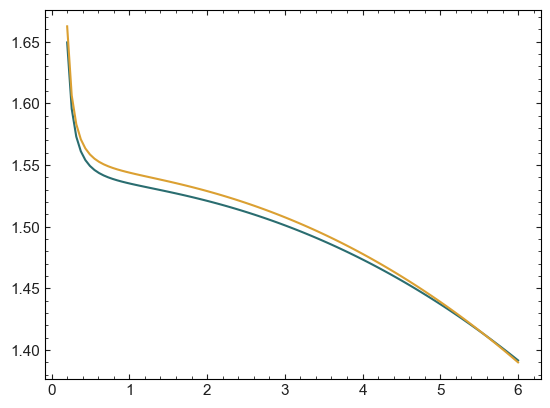

In [161]:
wavelength = np.linspace(0.2,6,100)
plt.plot(wavelength,n0_quartz(wavelength),'-')
plt.plot(wavelength,ne_quartz(wavelength),'-')

In [162]:
n_ex=np.sqrt(2.3849-0.01259*wavelength**2+0.01079*wavelength**(-2)+1.6518e-4*wavelength**(-4)-1.94741e-6*wavelength**(-6)+9.36476e-8*wavelength**(-8))

In [179]:
def berek_retardance_quartz(wavelength,tilt_angle):
    n_ord= n0_quartz(wavelength)
    n_ex= ne_quartz(wavelength)
    return 10000/1.064*np.sqrt(n_ord**2-np.sin(tilt_angle)**2)*(np.sqrt((1-(np.sin(tilt_angle)/n_ex)**2)/(1-(np.sin(tilt_angle)/n_ord)**2))-1)

In [186]:
n0_quartz(1.064)

1.5340955105293488

In [187]:
ne_quartz(1.064)

1.5428238725300123

In [180]:
(n0_quartz(1.064)-ne_quartz(1.064))*1e3

-8.728362000663514

Text(0.5, 1.0, 'Berek compensator Quartz')

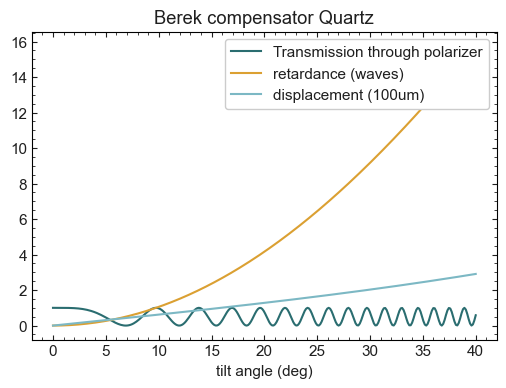

In [181]:
plt.figure(figsize=(6,4))
tilt = np.linspace(0,40*np.pi/180,300)
plt.plot(rad_to_degree(tilt),np.cos(np.pi*berek_retardance_quartz(1,tilt))**2,'-',label='Transmission through polarizer')
plt.plot(rad_to_degree(tilt),berek_retardance_quartz(1,tilt),'-',label='retardance (waves)')
plt.plot(rad_to_degree(tilt),10*displacement(tilt,1.54),'-',label='displacement (100um)')
plt.legend(loc='upper right')
plt.xlabel('tilt angle (deg)')
plt.title('Berek compensator Quartz')

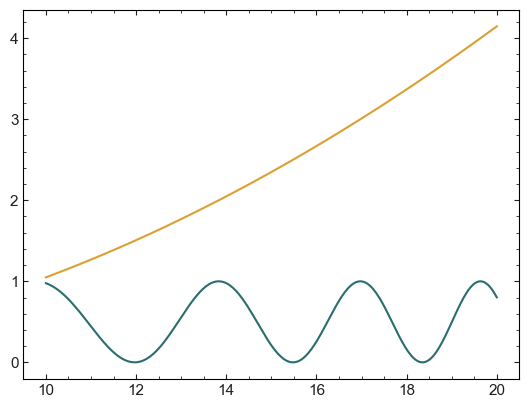

In [185]:
tilt = np.linspace(10*np.pi/180,20*np.pi/180,300)
plt.plot(rad_to_degree(tilt),np.cos(np.pi*berek_retardance_quartz(1.064,tilt))**2,'-')
plt.plot(rad_to_degree(tilt),berek_retardance_quartz(1.064,tilt),'-')

In [112]:
def transmissio_conv(transmission,thickness):
    return thickness/np.log(transmission)

In [122]:
np.log(0.94)/5

-0.012375080743617506

In [123]:
np.exp(-0.0123*1)

0.9877753358068531

In [ ]:
transmissio_conv(0.9,)

# BBO crsytal

In [201]:
n_ord= 1.6396 	
n_ex= 1.5225
print(n_ord-n_ex)

0.11709999999999998


In [199]:
def berek_retardance_bbo(wavelength,tilt_angle):
    n_ord= 1.6396 	
    n_ex= 1.5225
    return -2000/1.064*np.sqrt(n_ord**2-np.sin(tilt_angle)**2)*(np.sqrt((1-(np.sin(tilt_angle)/n_ex)**2)/(1-(np.sin(tilt_angle)/n_ord)**2))-1)

Text(0.5, 1.0, 'Berek compensator BBO')

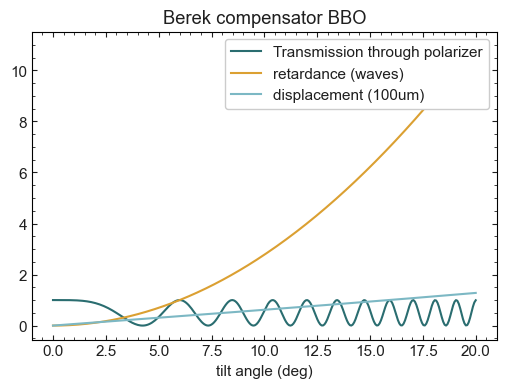

In [200]:
plt.figure(figsize=(6,4))
tilt = np.linspace(0,20*np.pi/180,300)
plt.plot(rad_to_degree(tilt),np.cos(np.pi*berek_retardance_bbo(1,tilt))**2,'-',label='Transmission through polarizer')
plt.plot(rad_to_degree(tilt),berek_retardance_bbo(1,tilt),'-',label='retardance (waves)')
plt.plot(rad_to_degree(tilt),10*displacement(tilt,1.54),'-',label='displacement (100um)')
plt.legend(loc='upper right')
plt.xlabel('tilt angle (deg)')
plt.title('Berek compensator BBO')